In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image

## **1)** Problema

$$ \theta - sin\theta = \frac{\pi}{2} $$

Primero hacemos una gráfica de la función para hacernos una idea de donde está la solución.

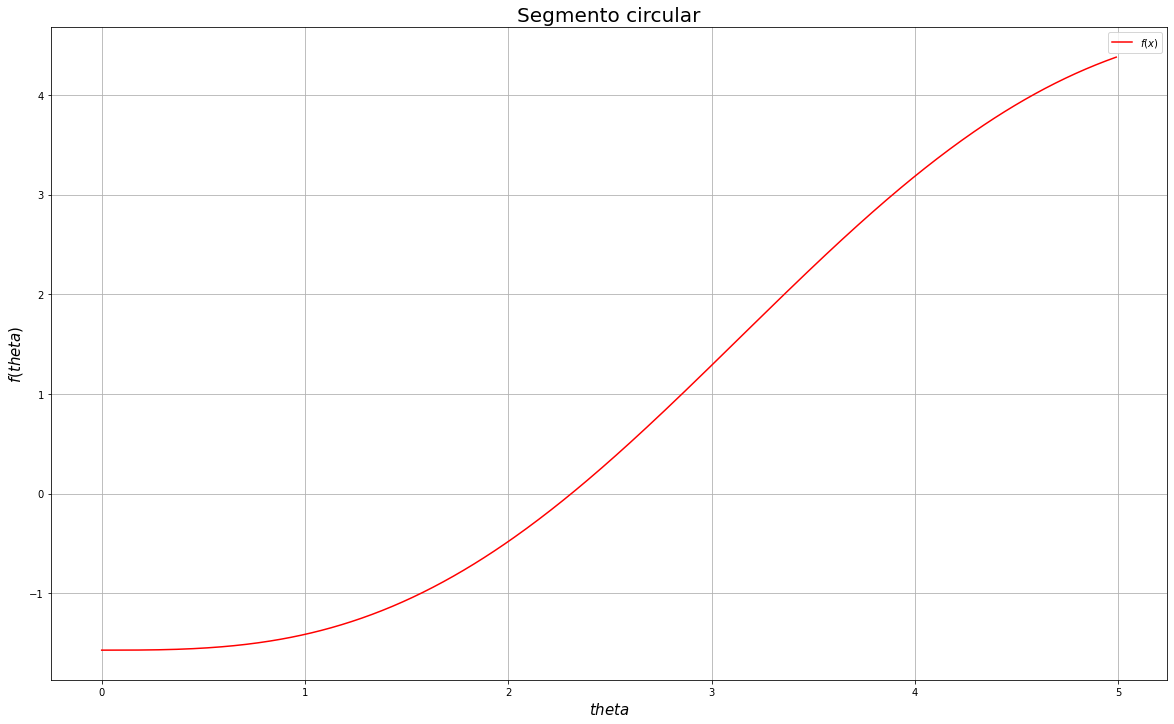

In [52]:
x=np.arange(0,5,0.01)
y=x-np.sin(x)-np.pi/2

plt.figure(figsize=(20,12))
plt.title('Segmento circular',size=20)
plt.plot(x,y,'r',label='$f(x)$')
plt.xlabel('$theta$',size=15)
plt.ylabel('$f(theta)$',size=15)
plt.grid()
#plt.xlim(2.309,2.31)
plt.legend()
plt.show()


De la gráfica inferimos que la slución está entre 2 y 3, a demás con el dataframe creado a partir de los valores de la función vemos que está entre 2.3 y 2.31.

In [7]:
d={'theta':x,'function':y}
df=pd.DataFrame(d)

In [8]:
df

,theta,function
0,0.00,-1.570796
1,0.01,-1.570796
2,0.02,-1.570795
3,0.03,-1.570792
4,0.04,-1.570786
...,...,...
495,4.95,4.351107
496,4.96,4.358704
497,4.97,4.366205
498,4.98,4.373609


Para utilizar los diferente métodos de solución de ecuaciones de una variable, definimos diferentes fuinciones: la función f(θ) para utilizar bisección y secante; g(θ) para punto fijo y la derivada de f(θ) para Newtron-Rhapson.

In [33]:
f1 = lambda x: x-np.sin(x)-np.pi/2
g1 = lambda x: x - f1(x)
df1 = lambda x: 1-np.cos(x)

a=optimize.bisect(f1,2.3,2.4)
b=optimize.fixed_point(g1,2.35)
c=optimize.newton(f1,2,df1)
d=optimize.newton(f1,2)

In [34]:
print('Por el método de bisección, la raíz es:',a)
print('Por el método de punto fijo,la raíz es:',b)
print('Por el método de Newton-Rhapson, la raíz es:',c)
print('Por el método de la secante, la raíz es:',d)

Por el método de bisección, la raíz es: 2.3098814600103648
Por el método de punto fijo,la raíz es: 2.309881460010057
Por el método de Newton-Rhapson, la raíz es: 2.3098814600100575
Por el método de la secante, la raíz es: 2.309881460010033


Se puede ver que con todos los métodos se obtiene un resultado similar.

## **2)** Problema de caída con viscocidad

$$s(t)=s_0 - \frac{mg}{k}t - m(\frac{mg+kv_0}{k^2})(1-e^{-kt/m})$$

Parámetros del problema:

In [35]:
g=32.17 #ft/s^2
s0=300 #ft
m=0.25 #lb
k=0.1 #lbs/ft
v0 = 0

Definición de las funciones necesarias en cada método.

In [45]:
f2 = lambda t: s0 - (m*g/k)*t - m*((m*g+k*v0)/k**2)*(1-np.exp(-k*t/m))
df2 = lambda t: -(m*g/k)-((m*g+k*v0)/k*(np.exp(-k*t/m)))
g2 = lambda t: t - f2(t)

Gráfica de la función para tener una idea de donde puede estar la raíz.

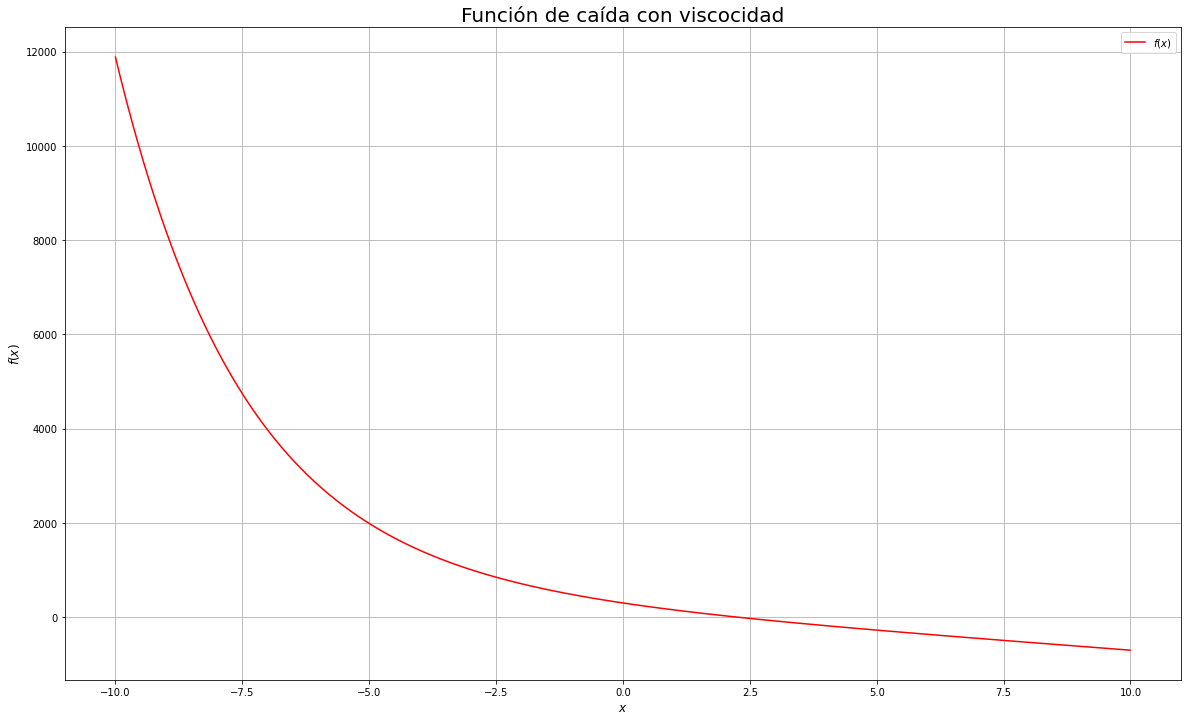

In [47]:
x1=np.arange(-10,10,0.01)
y1=f2(x1)

plt.figure(figsize=(20,12))
plt.title('Función de caída con viscocidad',size=20)
plt.plot(x1,y1,'r',label='$f(x)$')
plt.xlabel('$x$',size=12)
plt.ylabel('$f(x)$',size=12)
plt.grid()
#plt.xlim(1,3)
plt.legend()
plt.show()

In [53]:
a1=optimize.bisect(f2,1,3)
b1=optimize.fixed_point(g2,2)
c1=optimize.newton(f2,1,df2)
d1=optimize.newton(f2,1)

In [54]:
print('Por el método de bisección, la raíz es:',a1)
print('Por el método de punto fijo,la raíz es:',b1)
print('Por el método de Newton-Rhapson, la raíz es:',c1)
print('Por el método de la secante, la raíz es:',d1)

Por el método de bisección, la raíz es: 2.247588475684097
Por el método de punto fijo,la raíz es: 2.2475884756848012
Por el método de Newton-Rhapson, la raíz es: 2.2475884756848017
Por el método de la secante, la raíz es: 2.2475884756848017


De nuevo se puede observar la similitud de resultados utilizando los distintos métodos.

## **3)** Magnetización

$$m(T) = \tanh(\frac{m(T)}{T})$$

Se definen los parámetros y funciones para luego aplicar los métodos.

In [56]:
T=0.5

f3= lambda m: m-np.tanh(m/T)

g3= lambda m: m-f3(m)

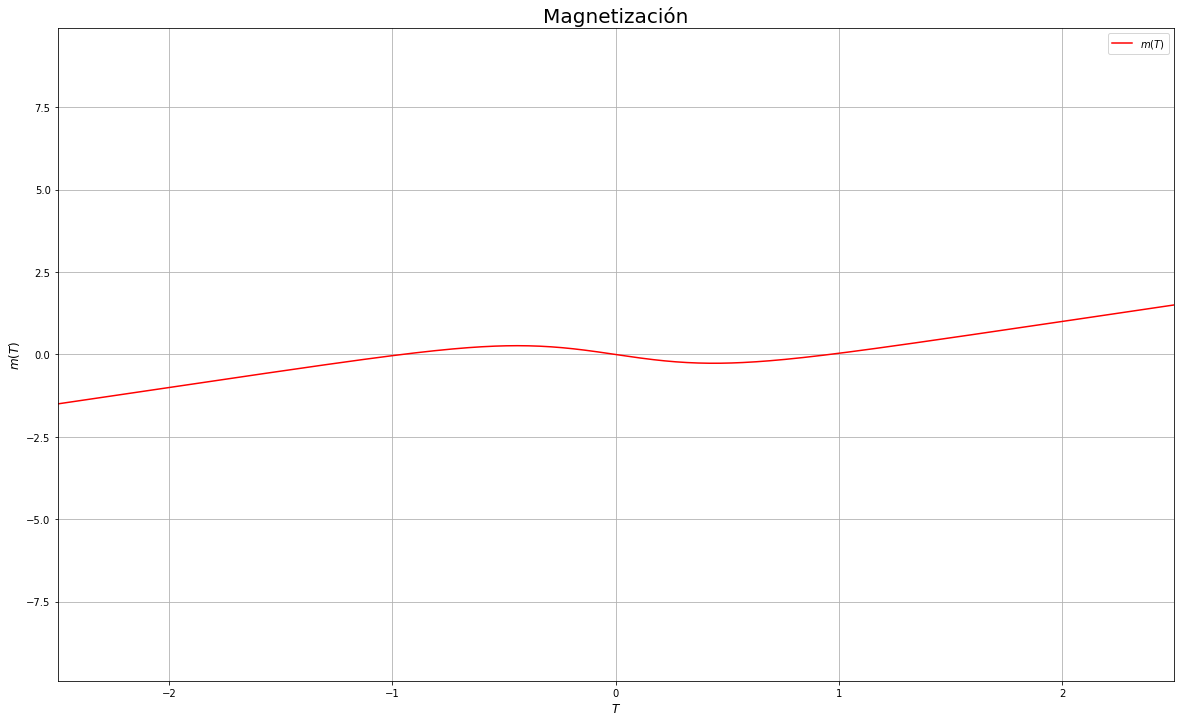

In [58]:
x2=np.arange(-10,10,0.01)
y2=f3(x2)

plt.figure(figsize=(20,12))
plt.title('Magnetización',size=20)
plt.plot(x2,y2,'r',label='$m(T)$')
plt.xlabel('$T$',size=12)
plt.ylabel('$m(T)$',size=12)
plt.grid()
plt.xlim(-2.5,2.5)
plt.legend()
plt.show()

Con la gráfica de la función podemos ver que existen tre raíces, una entre -1 y 0; la segunda parece estar en el origen y la última entre 0 y 1.

**a)** Con método de la secante: 

In [67]:
s1=optimize.newton(f3,-1)
s2=optimize.newton(f3,0)
s3=optimize.newton(f3,1)
print('La primera raíz es', round(s1,4))
print('La segunda raíz es', round(s2,4))
print('La tercer raíz es', round(s3,4))

La primera raíz es -0.9575
La segunda raíz es 0.0
La tercer raíz es 0.9575


**b)** Con método de punto fijo

In [77]:
pf1=optimize.fixed_point(g3,-1)
pf2=optimize.fixed_point(g3,0)
pf3=optimize.fixed_point(g3,1)
print('La primera raíz es', pf1)
print('La segunda raíz es', pf2)
print('La tercer raíz es', pf3)

La primera raíz es -0.9575040240772689
La segunda raíz es 0.0
La tercer raíz es 0.9575040240772689


**c)**

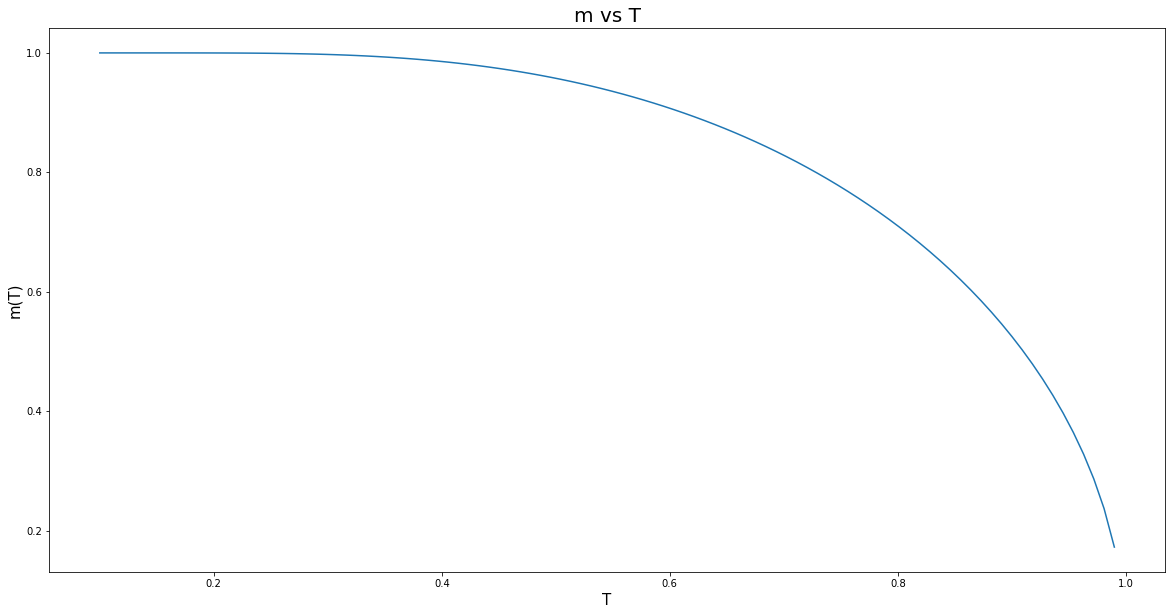

In [106]:
T1= np.linspace(0.1,0.99,100)
r1= np.zeros(len(T1))

for i in range(len(T1)):
  T=T1[i]
  r1[i] = optimize.newton(f3,1)

plt.figure(figsize=(20,10))
plt.title('m vs T', size=20)
plt.plot(T1,r1)
plt.xlabel('T', size=15)
plt.ylabel('m(T)', size=15)
plt.show()

## **4)** Fractal 

$$z_{n+1}=z_n-a\frac{f(z)}{f'(z)}$$

$$f´(z)=\frac{f(z+h)+f(z)}{h}$$

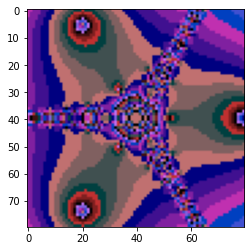

In [ ]:
Npx_X = 80
Npx_Y = 80

image = Image.new("RGB", (Npx_X, Npx_Y))

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)


xmin = -1
xmax = 1
ymin = -1
ymax = 1

zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
        
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)